&copy; Mirko Piani - *PhD student in Precision Orchard Management (POM), university of Bologna (IT)*
___

If you are having problems with the notebook, contact me at mirko.piani2@unibo.it

![numpy-logo](https://numpy.org/devdocs/_static/numpylogo.svg) 

[Numpy: from Begginners to Advanced tutorials](https://numpy.org/learn/)

Learning [NumPy](https://numpy.org/devdocs/user/whatisnumpy.html) in Python is highly beneficial, especially if you are working in fields such as data science, machine learning, scientific computing, or any domain that requires numerical computations. At the core of the *Numpy* package is the `ndarray` object. This encapsulates *n*-dimensional arrays of homogeneous data types, with many operations being performed in compiled code for performance.

There are several important differences between NumPy arrays and the standard Python sequences:

- NumPy arrays have a **fixed size at creation**, unlike Python lists (which can grow dynamically). Changing the size of an `ndarray` will create a new array and **delete the original**.

- The elements in a *NumPy* array are all required to be of the **same data type**, and thus will be the same size in memory. 

- **NumPy arrays facilitate advanced mathematical and other types of operations on large numbers of data**. Typically, such operations are executed more efficiently and with less code than is possible using Python’s built-in sequences.

The points about sequence size and speed are particularly important in scientific computing.

In [70]:
import time
import numpy as np
import matplotlib.pyplot as plt

## Speed test

> **Example**: consider the case of multiplying each element in a 1-D sequence (= vector) with the corresponding element in another sequence of the same length. 

If the data are stored in two Python **lists**, `a` and `b`, we could iterate over each element:

In [32]:
a = [10, 20, 30, 40, 50 , 60]  # list
b = [2, 1, 3, 4, 4 , 3]  # list

start = time.time()
c = []
for i in range(len(a)):
    c.append(a[i]*b[i])

end = time.time()
elapsed_time_list = end - start

print(c)
print(f'{elapsed_time_list= : .4f} s')

[20, 20, 90, 160, 200, 180]
elapsed_time_list=  0.0074 s


This produces the correct answer, but if `a` and `b` each contain **millions of numbers**, we will pay the price for the inefficiencies of looping in Python.

*NumPy* gives us the best: **element-by-element operations** are the “default mode” when an `ndarray` is involved, and the element-by-element operation is **speedily executed by pre-compiled C code**.

### `for` loop

In [41]:
size = 1_000_000  # Size of the arrays/lists

a = list(range(size))
b = list(range(size, 2*size))

start = time.time()
c = []
for i in range(len(a)):
    c.append(a[i]*b[i])

end = time.time()
elapsed_time_list_for = end - start

# print(c)
print(f'{elapsed_time_list_for = : .4f} s')


elapsed_time_list_for =  0.1053 s


### list comprehension

In [51]:
size = 1_000_000  # Size of the arrays/lists

a = list(range(size))
b = list(range(size, 2*size))

start = time.time()
# avoiding loop inefficiency with LIST COMPREHENSION
c = [a[i] * b[i] for i in range(size)]

end = time.time()
elapsed_time_list_compr = end - start

# print(c)
print(f'{elapsed_time_list_compr= : .4f} s')


elapsed_time_list_compr=  0.0682 s


### Numpy

In [71]:
size = 1_000_000  # Size of the arrays/lists
a = list(range(size))
b = list(range(size, 2*size))

# generate two vectors
a = np.array(a)
b = np.array(b)

start = time.time()
# element-wise operation
c = a * b

end = time.time()
elapsed_time_numpy = end - start

print(f'{elapsed_time_numpy= : .4f}')

elapsed_time_numpy=  0.0095


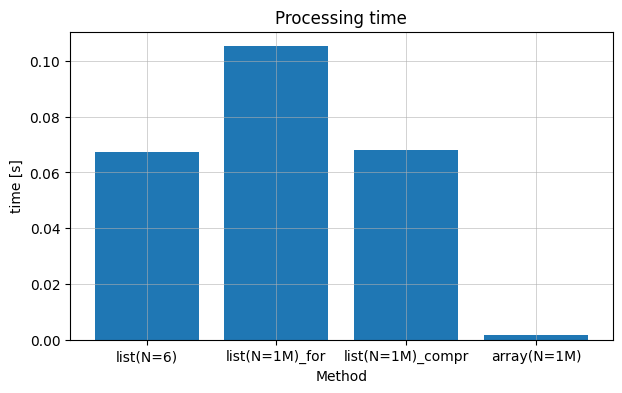

In [69]:
# plot the results 

plt.figure(figsize=(7, 4))
plt.bar(['list(N=6)', 'list(N=1M)_for', 'list(N=1M)_compr', 'array(N=1M)'], [elapsed_time_list, elapsed_time_list_for, elapsed_time_list_compr, elapsed_time_numpy])
plt.title('Processing time')
plt.ylabel('time [s]')
plt.xlabel('Method')
plt.grid(lw=.4)
plt.show()

Numpy demonstrated to be the faster in doing the *element-wise operation*

## different shapes

![shapes](https://hadrienj.github.io/assets/images/2.1/scalar-vector-matrix-tensor.png)

***Scalar***
:  is a single numerical value. It is a 0-dimensional quantity 
+ Scalars are represented by a single number
+ They do not have any direction, only magnitude)

***Vector***
:  is an ordered list of numbers. It is a 1-dimensional array of scalars 
+ Vectors have both magnitude and direction 
+ They are often used to represent physical quantities like velocity, force, and displacement.
+ In mathematics, a vector of length nn is called an *n*-dimensional vector.

***Matrix***
: is a 2-dimensional array of numbers, organized in *rows* and *columns* (i.e., grayscale images).
+ Matrices can represent linear transformations, systems of linear equations, and data tables.
+ A matrix with mm rows and nn columns is called an m×nm×n matrix.
+ Special types of matrices include square matrices, diagonal matrices, identity matrices, and zero matrices.

***Tensor***
: is a multi-dimensional array of numbers (i.e., RGB images). 
+ Tensors are used in various fields including physics (to describe stress, strain, and elasticity), computer graphics, and machine learning (where they are used to represent data and operations in neural networks).
+ The number of dimensions of a tensor is called its rank. For example, a rank-3 tensor has three dimensions.

<center>

| Concept | Dimension | Example                       |
|---------|-----------|-------------------------------|
| Scalar  | 0         | 55                            |
| Vector  | 1         | [1, 2, 3]                     |
| Matrix  | 2         | [[1, 2], [3, 4]]              |
| Tensor  | 3+        | [[[1, 2], [3, 4]], [[5, 6], [7, 8]]] |

</center>



> Example: consider you want to multiply a *5*-dimensional vector with a Scalar.

### using lists

In [77]:
scalar = 5
vector_size = 1_000_000  # Size of the arrays/lists
vector = list(range(vector_size))  # list

start = time.time()
output = [value * scalar for value in vector]
end = time.time()

elapsed_time_list = end - start


print(output[0:7])
print(f'{elapsed_time_list= : .4f}')

[0, 5, 10, 15, 20, 25, 30]
elapsed_time_list=  0.0452


### using numpy

In [78]:
scalar = 5
vector_size = 1_000_000  # Size of the arrays/lists
vector = np.array(list(range(vector_size)))  # convert a list into np.ndarray object

start = time.time()
output = vector * scalar
end = time.time()

elapsed_time_numpy = end - start

print(output[0:7])
print(f'{elapsed_time_numpy= : .4f}')

[ 0  5 10 15 20 25 30]
elapsed_time_numpy=  0.0080


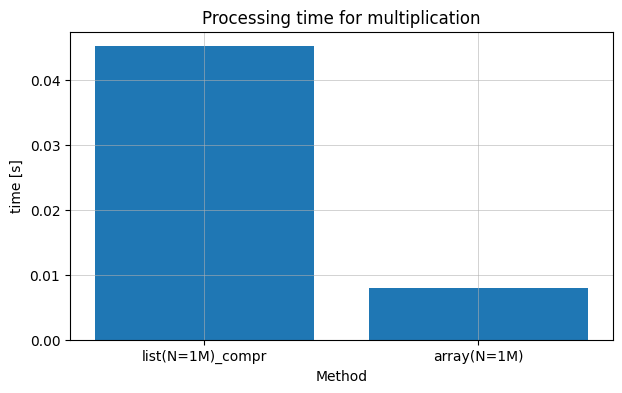

In [79]:
# plot the results 

plt.figure(figsize=(7, 4))
plt.bar(['list(N=1M)_compr', 'array(N=1M)'], [elapsed_time_list, elapsed_time_numpy])
plt.title('Processing time for multiplication')
plt.ylabel('time [s]')
plt.xlabel('Method')
plt.grid(lw=.4)
plt.show()

In [86]:
print(f'Numpy was {(1 - elapsed_time_numpy/elapsed_time_list)*100 : .2f}% faster')

Numpy was  82.27% faster


# `ndarray` object

### Scalar

In [104]:
# create a scalar
scalar_obj = np.array(5)

# create a scalar of specific data type
scalar_int = np.int32(5)  # int32 (max is 2^32)
scalar_float = np.float64(5)  # float64 (max is 2^64)

print(scalar_obj)
print(scalar_obj.dtype)
print(type(scalar_obj), "\n")

print(scalar_int)
print(scalar_int.dtype)
print(type(scalar_int), "\n")

print(scalar_float)
print(scalar_float.dtype)
print(type(scalar_float))


5
int64
<class 'numpy.ndarray'> 

5
int32
<class 'numpy.int32'> 

5.0
float64
<class 'numpy.float64'>


In [103]:
# explore scalar
scalar = np.array(5, dtype=np.uint8)

print(f'Type: {scalar.dtype}')
print(f'Dimensions: {scalar.ndim}')
print(f'Shape: {scalar.shape}')
print(f'Size: {scalar.size}')


Type: uint8
Dimensions: 0
Shape: ()
Size: 1


In [131]:
scalar1 = np.array(15)
scalar2 = np.array(5)

# mathematical operations
print('*** Operations:')
print(f'Addition {scalar1 + scalar2}')
print(f'Substraction {scalar1 - scalar2}')
print(f'Multiplication {scalar1 * scalar2}')
print(f'Floating-Division {scalar1 / scalar2}')
print(f'Floor-division {scalar1 // scalar2}')
print(f'Exponentiation {scalar1 ** scalar2}')


*** Operations:
Addition 20
Substraction 10
Multiplication 75
Floating-Division 3.0
Floor-division 3
Exponentiation 759375


### Vector

In [106]:
# create a vector array
vector_obj = np.array([10, 5, 4, 3])

# create a vector array of specific data type
vector_int = np.array([10, 5, 4, 3], np.uint32) # int32 (max is 2^32)
vector_float = np.array([10, 5, 4, 3], np.float64)  # float64 (max is 2^64)

print(vector_obj)
print(vector_obj.dtype)
print(type(vector_obj), "\n")

print(vector_int)
print(vector_int.dtype)
print(type(vector_int), "\n")

print(vector_float)
print(vector_float.dtype)
print(type(vector_float))


[10  5  4  3]
int64
<class 'numpy.ndarray'> 

[10  5  4  3]
uint32
<class 'numpy.ndarray'> 

[10.  5.  4.  3.]
float64
<class 'numpy.ndarray'>


In [107]:
# explore vector array
vector = np.array([10, 5, 4, 3])

print(f'Type: {vector.dtype}')
print(f'Dimensions: {vector.ndim}')
print(f'Shape: {vector.shape}')
print(f'Size: {vector.size}')


Type: int64
Dimensions: 1
Shape: (4,)
Size: 4


In [109]:
# create vector array with START number, STOP number, NUMBER of elements to take, DATA TYPE
arr = np.linspace(0, 100, 10, dtype=np.uint8)
print(arr)

[  0  11  22  33  44  55  66  77  88 100]


In [110]:
# create vector array with START number, STOP number, STEP to take between elements, DATA TYPE
arr = np.arange(0, 100, 10, dtype=np.uint8)
print(arr)

[ 0 10 20 30 40 50 60 70 80 90]


In [135]:
# create vector array of datatype INT with random numbers between START number, STOP number, SIZE
arr = np.random.randint(0, 8, 10)
print(arr)

[3 3 4 5 0 0 2 0 0 3]


In [139]:
# create a vector array of datatype FLOAT with random numbers
arr = np.random.rand(8)
print(arr)

[0.47457288 0.25219909 0.46684836 0.19304106 0.16915109 0.8458553
 0.25175041 0.8052821 ]


In [142]:
vector1 = np.arange(0, 10, 1, dtype=np.int16)
vector2 = np.linspace(10, 20, 10, dtype=np.int32)

print(f'{vector1= }\n')
print(f'{vector2= }\n')

# mathematical operations
print('*** Operations:')
print(f'Addition {vector1 + vector2}\n')
print(f'Substraction {vector1 - vector2}\n')
print(f'Multiplication {vector1 * vector2}\n')
print(f'Floating-Division {vector1 / vector2}\n')
print(f'Floor-division {vector1 // vector2}\n')
print(f'Exponentiation {vector1 ** vector2}\n')


vector1= array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16)

vector2= array([10, 11, 12, 13, 14, 15, 16, 17, 18, 20], dtype=int32)

*** Operations:
Addition [10 12 14 16 18 20 22 24 26 29]

Substraction [-10 -10 -10 -10 -10 -10 -10 -10 -10 -11]

Multiplication [  0  11  24  39  56  75  96 119 144 180]

Floating-Division [0.         0.09090909 0.16666667 0.23076923 0.28571429 0.33333333
 0.375      0.41176471 0.44444444 0.45      ]

Floor-division [0 0 0 0 0 0 0 0 0 0]

Exponentiation [          0           1        4096     1594323   268435456   452807053
  -683606016 -2094633337           0   689956897]

